In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [5]:
df = pd.read_csv('appl_1980_2014.csv')

In [6]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


In [7]:
df.shape

(8465, 7)

In [8]:
df['Date'] = pd.to_datetime(df['Date'])

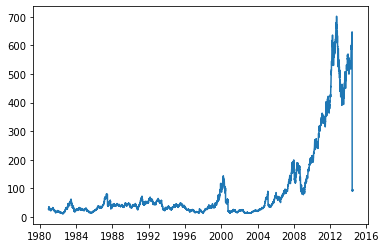

In [9]:
plt.plot(df['Date'], df['Close'])
plt.show()

In [10]:
X = df[['Open', 'High', 'Low']].values
y = df['Close'].values

In [11]:
X[:5]

array([[96.27, 96.8 , 93.92],
       [94.14, 95.99, 94.1 ],
       [93.67, 94.1 , 93.2 ],
       [93.87, 94.06, 93.09],
       [93.52, 94.07, 93.13]])

In [12]:
y[:5]

array([95.35, 95.97, 94.03, 93.48, 93.52])

In [13]:
n = len(X)
X0 = np.zeros(n)

In [14]:
X = np.c_[X0, X]

In [15]:
X[:5]

array([[ 0.  , 96.27, 96.8 , 93.92],
       [ 0.  , 94.14, 95.99, 94.1 ],
       [ 0.  , 93.67, 94.1 , 93.2 ],
       [ 0.  , 93.87, 94.06, 93.09],
       [ 0.  , 93.52, 94.07, 93.13]])

In [16]:
b = np.zeros(X.shape[1])

In [17]:
b

array([0., 0., 0., 0.])

In [19]:
minmax = MinMaxScaler()
X_scale = minmax.fit_transform(X)

In [20]:
y_scale = minmax.fit_transform(y.reshape(-1,1))

In [21]:
X_scale[:5]

array([[0.        , 0.12317551, 0.12346711, 0.12042349],
       [0.        , 0.12009432, 0.12229988, 0.1206849 ],
       [0.        , 0.11941443, 0.11957634, 0.11937784],
       [0.        , 0.11970374, 0.1195187 , 0.11921809],
       [0.        , 0.11919744, 0.11953311, 0.11927618]])

In [22]:
y_scale[:5]

array([[0.1220518 ],
       [0.12294892],
       [0.1201418 ],
       [0.11934597],
       [0.11940385]])

In [23]:
def cost_function(x,y,b):
    y_pred = np.dot(x,b)
    error = np.sum((y_pred - y) ** 2) / n
    return error

In [30]:
def gradientDescent(X,y,epochs,alpha):
    b = np.zeros(X.shape[1])
    n = len(X)
    history = []
    for i in range(epochs):
        y_pred = np.dot(X,b)
        loss = y_pred - y
        grad_b = (2/n) * loss.T.dot(X)
        b = b - grad_b * alpha
        err = cost_function(X,y,b)
        history.append(err)
    return b, history

In [34]:
epochs = 100
alpha = 0.1
coef, loss = gradientDescent(X_scale,y_scale.flatten(),epochs,alpha)

In [35]:
coef

array([0.        , 0.32394476, 0.32602215, 0.32167653])

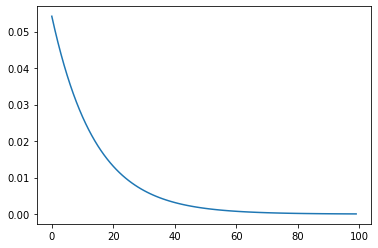

In [36]:
plt.plot(loss)
plt.show()

In [37]:
test_x = np.array([[0, 0.12317551, 0.12346711, 0.12042349]])

In [39]:
np.dot(test_x, coef)

array([0.11889248])

In [41]:
minmax.inverse_transform([np.dot(test_x, coef)])

array([[93.1665955]])

In [42]:
y_pred = np.dot(X_scale, coef)

In [43]:
y_pred[:5]

array([0.11889248, 0.11759789, 0.11606926, 0.1160928 , 0.11595218])

In [44]:
y_pred = minmax.inverse_transform([y_pred])

In [45]:
y_pred[:5]

array([[93.16659492, 92.27190336, 91.21546731, ..., 24.84241271,
        26.79169287, 28.20344087]])